# IN CLASS EXERCISE 12-12-18

(2,)
(2, 2)


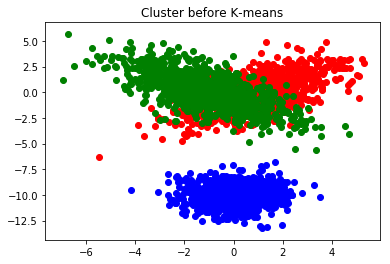

In [23]:
import numpy as np
from matplotlib import pyplot as plt

mu1 = np.array([1,0])
mu2 = np.array([-1 ,0])
mu3 = np.array([0,-10])
lambda1 = np.array([[4,0],[0,1]])
lambda2 = np.array([[1,0],[0,5]])
U = np.array([[1/np.sqrt(2),-1/np.sqrt(2)],[1/np.sqrt(2), 1/np.sqrt(2)]])
sigma1 = U @ lambda1 @ U.T
sigma2 = U @ lambda2 @ U.T
sigma3 = np.identity(2)
print(mu1.shape)
print(sigma1.shape)
#Data generation of 1000 data samples
X = np.zeros((3000,2))
X[0:1000] = np.random.multivariate_normal(mu1,sigma1,1000)
X[1000:2000] = np.random.multivariate_normal(mu2,sigma2,1000)
X[2000:3000] = np.random.multivariate_normal(mu3,sigma3,1000)

# Plot the data
plt.title("Cluster before K-means")
plt.scatter(X[0:1000,0],X[0:1000,1], c='r')
plt.scatter(X[1000:2000,0],X[1000:2000,1], c='g')
plt.scatter(X[2000:3000,0],X[2000:3000,1], c='b')
plt.show()

In [19]:
#print(Bucket.shape)
# Randomly assign the data into a cluster
# Shuffle the bucket and assign the first 1000 samples into each cluster

cluster = np.zeros((3000))
for i in range(3000):
    cluster[i] = np.random.randint(0,3)
    
# Run the k-means algorithm
#Calculate the centroids
def dist(a, b):
    return np.linalg.norm(a - b)



change = True
iteration = 0
while change:
    change = False
    mean = np.zeros((3,2))
    num_data = np.zeros((3))
    for i in range(3000):
        num_data[int(cluster[i])] += 1
    for i in range(3000):
        mean[int(cluster[i])] += X[i]
    for i in range(3):
        mean[i]/=num_data[i]
        
    for i in range(3000):
        for j in range(3):
            if cluster[i] != j:
                if (dist(X[i], mean[j]) < dist(X[i], mean[int(cluster[i])])):
                    cluster[i] = j
                    change = True



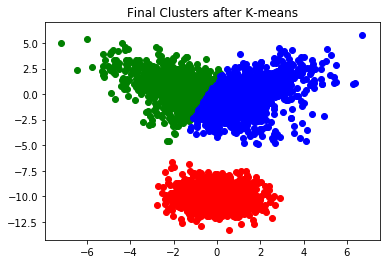

In [22]:
# Plot all the clusters
C1 = []
C2 = []
C3 = []
for i in range(3000):
    if cluster[i] == 0:
        C1.append(X[i])
    elif(cluster[i] == 1):
        C2.append(X[i])
    else:
        C3.append(X[i])

C1 = np.asarray(C1)
C2 = np.asarray(C2)    
C3 = np.asarray(C3)

# Plot the clusters
plt.title("Final Clusters after K-means")
plt.scatter(C1[:,0],C1[:,1], c='r')
plt.scatter(C2[:,0],C2[:,1], c='g')
plt.scatter(C3[:,0],C3[:,1], c='b')
plt.show()